In [ ]:
!pip install googletrans==3.1.0a0
!pip install --upgrade diffusers transformers -q

In [ ]:
!pip install --upgrade torch

In [ ]:
from googletrans import Translator
from pathlib import Path
import tqdm
import torch
import pandas as pd
import numpy as np
from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cv2

In [ ]:
def get_translation(text,dest_lang):
  translator = Translator()
  translated_text = translator.translate(text, dest=dest_lang)
  return translated_text.text

In [ ]:
class CFG:
    #device = "cpu"
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    seed = 42
    generator = torch.Generator(device=device).manual_seed(seed)
    image_gen_steps = 35
    image_gen_model_id = "stabilityai/stable-diffusion-2"
    image_gen_size = (400, 400)
    image_gen_guidance_scale = 9
    prompt_gen_model_id = "gpt3"
    prompt_dataset_size = 6
    prompt_max_length = 12
    learning_rate = 0.001  # Set your desired learning rate
    mse_loss = torch.nn.MSELoss()  # Mean Squared Error Loss

In [ ]:
generated_image = torch.rand((1, 3, *CFG.image_gen_size), dtype=torch.float16, device=CFG.device, requires_grad=True)
target_image = torch.rand((1, 3, *CFG.image_gen_size), dtype=torch.float16, device=CFG.device, requires_grad=True)
# Define the optimizer
optimizer = torch.optim.Adam([generated_image], lr=CFG.learning_rate)

In [ ]:
image_gen_model = StableDiffusionPipeline.from_pretrained(
    CFG.image_gen_model_id, torch_dtype=torch.float16,
    revision="fp16", guidance_scale=9
)
image_gen_model = image_gen_model.to(CFG.device)

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_utils.py:263: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
unet/diffusion_pytorch_model.safetensors not found
Keyword arguments {'guidance_scale': 9} are not expected by StableDiffusionPipeline and will be ignored.
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
def generate_image(prompt, model):
    image = model(
        prompt, num_inference_steps=CFG.image_gen_steps,
        generator=CFG.generator,
        guidance_scale=CFG.image_gen_guidance_scale
    ).images[0]
    optimizer.zero_grad()
    optimizer.step()
    image = image.resize(CFG.image_gen_size)
    return image

  0%|          | 0/35 [00:00<?, ?it/s]

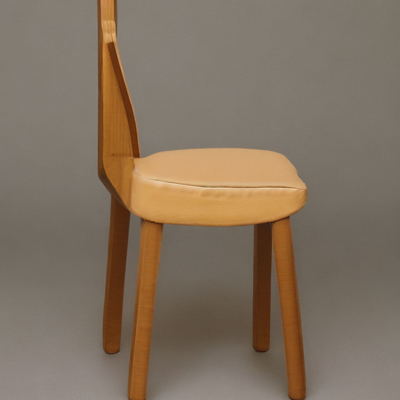

In [ ]:
translation = get_translation("chair","en")
generate_image(translation, image_gen_model)